# Innomatics Data Science Internship |  Entrance Test Part 2  | Hackathon

## Import Libraries

In [1]:
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt

### 1) Download the data from the above link. How many ".csv" files are available in the dataset?

In [2]:
file_name = r"C:\Users\mural\Downloads\movie_data.zip"
  
with ZipFile(file_name, 'r') as zip: 
    zip.printdir() 
  
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
links.csv                                      2018-09-27 02:20:10       197979
movies.csv                                     2018-09-27 02:19:56       494431
ratings.csv                                    2018-09-27 02:19:38      2483723
README.txt                                     2018-09-27 02:20:12         8342
tags.csv                                       2018-09-27 02:19:40       118660
Extracting all the files now...
Done!


### 2) What is the shape of "movies.csv"?

In [3]:
csv_file_path = "movies.csv"

df = pd.read_csv(csv_file_path)

shape = df.shape

print("Shape of 'movies.csv':", shape)

Shape of 'movies.csv': (9742, 3)


### 3) What is the shape of "ratings.csv"?

In [4]:
csv_file_path = "ratings.csv"

df = pd.read_csv(csv_file_path)

shape = df.shape

print("Shape of 'ratings.csv':", shape)

Shape of 'ratings.csv': (100836, 4)


### 3) How many unique "userId" are available in "ratings.csv"?

In [5]:
csv_file_path = "ratings.csv"

df_ratings = pd.read_csv(csv_file_path)

unique_user_ids = df_ratings['userId'].nunique()

print("Number of unique userIds in 'ratings.csv':", unique_user_ids)

Number of unique userIds in 'ratings.csv': 610


### 4) Which movie has recieved maximum number of user ratings?

In [6]:
ratings_file_path = "ratings.csv"
movies_file_path = "movies.csv"

df_ratings = pd.read_csv(ratings_file_path)
df_movies = pd.read_csv(movies_file_path)

merged_df = pd.merge(df_ratings, df_movies, on='movieId')

movie_ratings_count = merged_df.groupby('title')['rating'].count()

max_rated_movie = movie_ratings_count.idxmax()

print("Movie with the maximum number of user ratings:", max_rated_movie)

Movie with the maximum number of user ratings: Forrest Gump (1994)


### 5) Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [7]:
tags_file_path = "tags.csv"
movies_file_path = "movies.csv"

df_tags = pd.read_csv(tags_file_path)
df_movies = pd.read_csv(movies_file_path)

merged_df = pd.merge(df_tags, df_movies, on='movieId')

matrix_tags = merged_df[merged_df['title'] == 'Matrix, The (1999)']['tag']

print("Tags for 'Matrix, The (1999)':")
print(matrix_tags)

Tags for 'Matrix, The (1999)':
1270          martial arts
1271                sci-fi
1272    alternate universe
1273            philosophy
1274      post apocalyptic
Name: tag, dtype: object


### 6) What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [8]:
ratings_file_path = "ratings.csv"
movies_file_path = "movies.csv"

df_ratings = pd.read_csv(ratings_file_path)
df_movies = pd.read_csv(movies_file_path)

merged_df = pd.merge(df_ratings, df_movies, on='movieId')

terminator_2_ratings = merged_df[merged_df['title'] == 'Terminator 2: Judgment Day (1991)']

average_rating = terminator_2_ratings['rating'].mean()

print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating)

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


### 7) How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

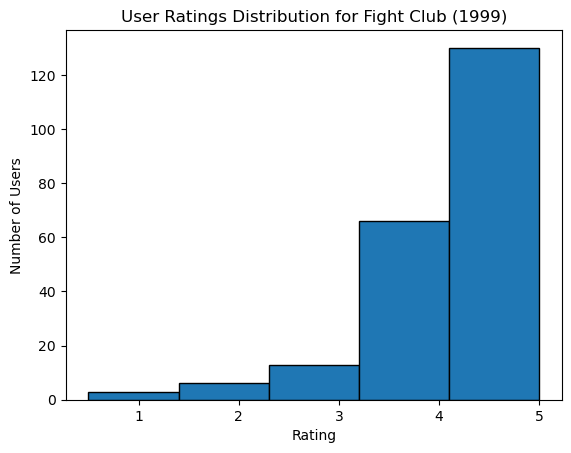

In [9]:
ratings_file_path = "ratings.csv"
movies_file_path = "movies.csv"

df_ratings = pd.read_csv(ratings_file_path)
df_movies = pd.read_csv(movies_file_path)

merged_df = pd.merge(df_ratings, df_movies, on='movieId')

fight_club_ratings = merged_df[merged_df['title'] == 'Fight Club (1999)']

plt.hist(fight_club_ratings['rating'], bins=5, edgecolor='black')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

### 8) Which movie is the most popular based on  average user ratings?

In [10]:
ratings_file_path = 'ratings.csv'
movies_file_path = 'movies.csv'

ratings_df = pd.read_csv(ratings_file_path)
movies_df = pd.read_csv(movies_file_path)

grouped_ratings = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

filtered_movies = merged_df[merged_df['count'] > 50]

most_popular_movie = filtered_movies.loc[filtered_movies['mean'].idxmax(), 'title']

print("Most popular movie based on average user ratings (with more than 50 ratings):", most_popular_movie)

Most popular movie based on average user ratings (with more than 50 ratings): Shawshank Redemption, The (1994)


### 9) Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [11]:
ratings_file_path = "ratings.csv"
movies_file_path = "movies.csv"

df_ratings = pd.read_csv(ratings_file_path)
df_movies = pd.read_csv(movies_file_path)

merged_df = pd.merge(df_ratings, df_movies, on='movieId')

ratings_count = merged_df['title'].value_counts()

top5_movies = ratings_count.head(5)

print("Top 5 popular movies based on number of user ratings:")
print(top5_movies)

Top 5 popular movies based on number of user ratings:
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: title, dtype: int64


### 10) Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [12]:
ratings_file_path = "ratings.csv"
movies_file_path = "movies.csv"

df_ratings = pd.read_csv(ratings_file_path)
df_movies = pd.read_csv(movies_file_path)

merged_df = pd.merge(df_ratings, df_movies, on='movieId')

sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]

ratings_count_sci_fi = sci_fi_movies['title'].value_counts()

third_most_popular_sci_fi = ratings_count_sci_fi.index[2]

print("Third most popular Sci-Fi movie based on number of user ratings:", third_most_popular_sci_fi)

Third most popular Sci-Fi movie based on number of user ratings: Jurassic Park (1993)


### 11) Mention the movieId of the movie which has the highest IMDB rating.

In [13]:
ratings_file_path = 'ratings.csv'

ratings_df = pd.read_csv(ratings_file_path)

average_ratings = ratings_df.groupby('movieId')['rating'].mean().reset_index()

highest_rated_movie_id = average_ratings.loc[average_ratings['rating'].idxmax(), 'movieId']

print("MovieId of the movie with the highest average user rating:", highest_rated_movie_id)

MovieId of the movie with the highest average user rating: 53


### 12) Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [14]:
movies_file_path = 'movies.csv'
ratings_file_path = 'ratings.csv'

movies_df = pd.read_csv(movies_file_path)
ratings_df = pd.read_csv(ratings_file_path)

grouped_ratings = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]

highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['mean'].idxmax(), 'movieId']

print("MovieId of the Sci-Fi movie with the highest average user rating :", highest_rated_sci_fi_movie)

MovieId of the Sci-Fi movie with the highest average user rating : 3687
